# Green Screen Demo using OpenCV

Implementing green/blue screen effects with OpenCV

### Import resources

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

### Read in and display the image

In [18]:
# Read in the image/s
image = cv2.imread('images/lion-grscr.jpg')

#print out the type of image data and its dimensions (height, width, and color)
print('image type:', type(image), 
      ' with dimensions:', image.shape)

image is: <class 'numpy.ndarray'>  with dimensions: (401, 714, 3)


In [19]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

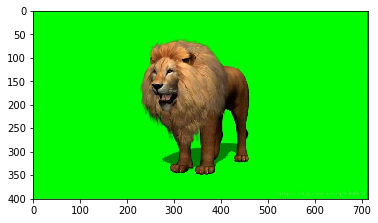

In [20]:
# Display the image
plt.imshow(image_copy)

### Define the color threshold
We define lower and upper bounds for the colour that we need to isolate and remove: blue and green

In [21]:
# play around with these values until you isolate the color background
lower_green = np.array([0,100, 0])
upper_green = np.array([80, 255,255])

lower_blue = np.array([0, 0, 100])    
upper_blue = np.array([120, 100, 255])

### Create a mask
- Masks are a common way to isolate a selected area of interest.

- The `inRange()` function takes in an image in our lower and upper colour range and defines a mask by asking if the colour value of each image pixel falls in that range of colour thresholds. 

- If it does, then the mask is allowed to be displayed and if not, it will block it out and turn the pixel black.

In [22]:
# Define the masked area
green_mask = cv2.inRange(image_copy, lower_green, upper_green)

#blue_mask = cv2.inRange(image1_copy, lower_blue, upper_blue)

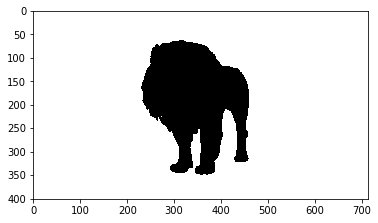

In [23]:
# Vizualize the masks
plt.imshow(green_mask,'gray')

The white area is where the image will be allowed to show through and the black will be blocked out. 

- To select the blue/green screen, we ask for the part of the image that overlaps with the part of the mask that is white (or not black).  
- i.e., we’ll select the part of the image where the area of the mask is not equal to zero, using `mask != 0` .  
- So, to block this background area out we then set the pixels to black `[0,0,0]`. 

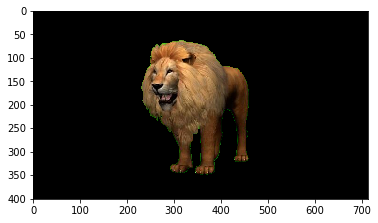

In [24]:
# Mask the image to let the tree show through
masked_image = np.copy(image_copy)
masked_image[green_mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

### Mask and add a background image

background_image is: <class 'numpy.ndarray'>  with dimensions: (1080, 1920, 3)


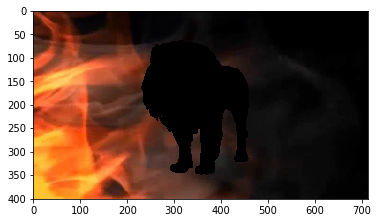

In [25]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/fire-bg.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (size of the orig image: 401x714)
crop_background = background_image[0:401, 0:714]

# Mask the cropped background so that the lion area is blocked(using the mask!!)
crop_background[green_mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

### Create a complete image

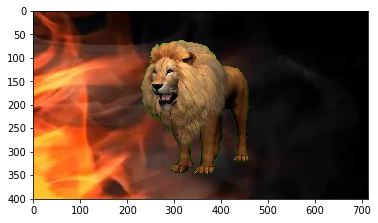

In [26]:
# Add the two images together to create a complete image!
final_image = crop_background + masked_image

# Display the result
plt.imshow(final_image)

### Saving the image
To save the image to disk, convert back from RGB to BGR and the use the `imwrite()` function

In [27]:
final_image = cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('images/fire-lion.png', final_image)

True